In [1]:
# importing libraries (solving using tensorflow )
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class MNISTClassifier:
    """
    This MNISTClass implemented for classifying the handwrittern digits
    """
    def __init__(self):
        """initializing the model"""
        self.model = None

    def load_data(self):
        """Loading the MNIST dataset from tensorflow and resizing (to 28*28)and rescaling it"""
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
        x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
        return x_train, y_train, x_test, y_test

    def build_model(self):
        """building the model using CNN architecture, we use 3*3 filter and
         2 maxpooling and 2 dense layers, used relu as activation function"""
        self.model = Sequential()
        self.model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
        self.model.add(MaxPooling2D((2, 2)))
        self.model.add(Conv2D(64, (3, 3), activation='relu'))
        self.model.add(MaxPooling2D((2, 2)))
        self.model.add(Flatten())
        self.model.add(Dense(64, activation='relu'))
        self.model.add(Dense(10, activation='softmax'))

    def print_model_summary(self):
        """print the model architecture
        """
        self.model.summary()

    def compile_model(self):
        """compiling the model using sparse_categorical_crossentropy loss function and
           adam optimizer and also passing the accuracy"""
        self.model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

    def train_model(self, x_train, y_train, epochs=5, batch_size=32, validation_data=None):
        """Train the model using training data"""
        self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=validation_data)

    def evaluate_model(self, x_test, y_test):
        """evaluating the model using test data and see how the model works by measuring accuracy of the model"""
        y_pred = np.argmax(self.model.predict(x_test), axis=-1)
        loss, accuracy = self.model.evaluate(x_test, y_test)
        print('Test Loss:', loss)
        print('Test Accuracy:', accuracy)
        return y_pred

    def plot_confusion_matrix(self, y_true, y_pred, classes):
        """Ploting a confusion matrix to see number of true positives and false positives"""
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(10, 10))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f'
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                plt.text(j, i, format(cm[i, j], fmt),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.show()


In [ ]:
# Create an instance of the MNISTClassifier
classifier = MNISTClassifier()

# Load the MNIST dataset
x_train, y_train, x_test, y_test = classifier.load_data()


In [4]:
# Build the model
classifier.build_model()
classifier.print_model_summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [5]:
#Compile the model
classifier.compile_model()


In [6]:
# Train the model
classifier.train_model(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 [==============================] - 88s 46ms/step - loss: 0.1447 - accuracy: 0.9555 - val_loss: 0.0527 - val_accuracy: 0.9822
Epoch 2/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0472 - accuracy: 0.9858 - val_loss: 0.0355 - val_accuracy: 0.9887
Epoch 3/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0330 - accuracy: 0.9897 - val_loss: 0.0334 - val_accuracy: 0.9889
Epoch 4/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0249 - accuracy: 0.9924 - val_loss: 0.0375 - val_accuracy: 0.9882
Epoch 5/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0194 - accuracy: 0.9936 - val_loss: 0.0422 - val_accuracy: 0.9884


In [7]:
# Evaluate the model and get predicted labels
y_pred = classifier.evaluate_model(x_test,y_test)


313/313 [==============================] - 4s 12ms/step - loss: 0.0422 - accuracy: 0.9884
Test Loss: 0.0422179251909256
Test Accuracy: 0.9883999824523926


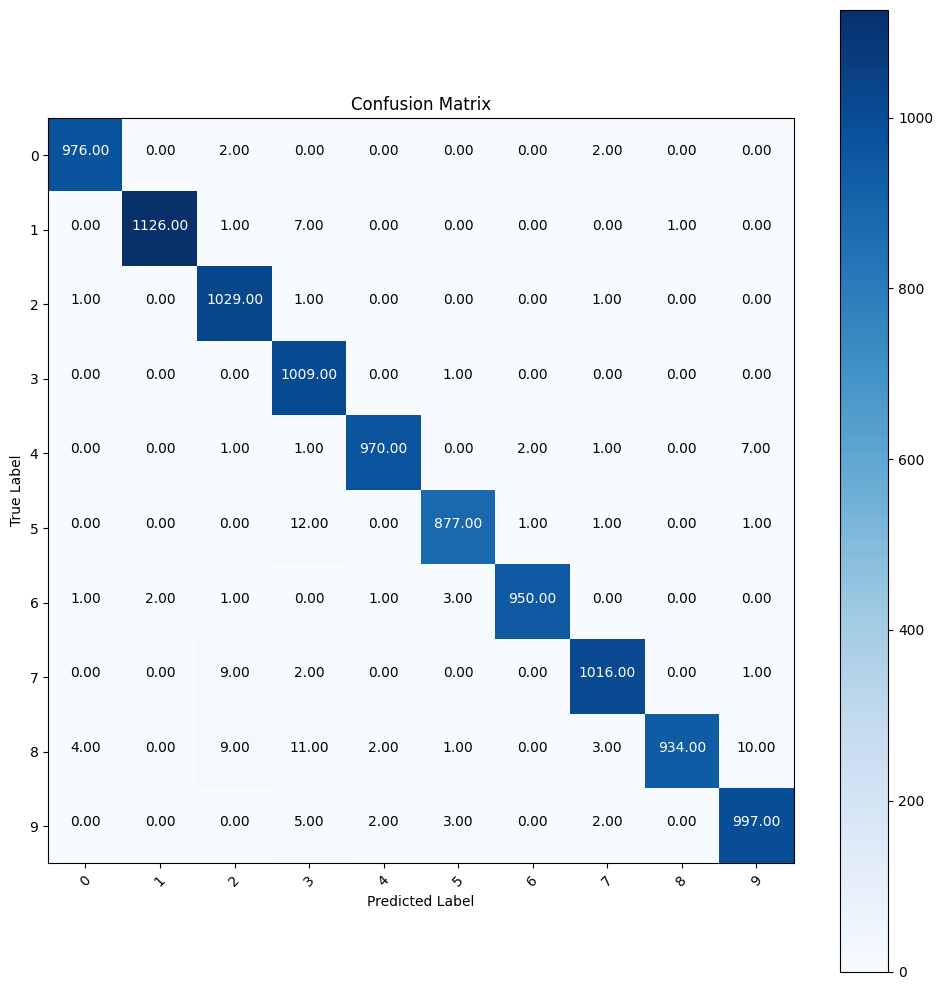

In [8]:
# Define class labels for the confusion matrix
class_labels = [str(i) for i in range(10)]

# Plot the confusion matrix
classifier.plot_confusion_matrix(y_test,y_pred, class_labels)